2016-05-03 10:49:04,428 - modeltools.grid._grid -   DEBUG: Initialized P-grid using projection +proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere
2016-05-03 10:49:04,429 - modeltools.grid._grid -   DEBUG: Lower left corner lon/lat of grid: (-89.5,45.5)
2016-05-03 10:49:04,430 - modeltools.grid._grid -   DEBUG: Grid spacing in projection coords: (2e+04,2e+04)
2016-05-03 10:49:04,430 - modeltools.grid._grid -   DEBUG: Number of grid Nodes in x/y      : (  400,  300)
2016-05-03 10:49:04,431 - modeltools.grid._grid -   DEBUG: Min   x projection coordinate = -3.65e+06
2016-05-03 10:49:04,432 - modeltools.grid._grid -   DEBUG: Max   x projection coordinate = 4.37e+06
2016-05-03 10:49:04,432 - modeltools.grid._grid -   DEBUG: Min   y projection coordinate = -3.71e+06
2016-05-03 10:49:04,433 - modeltools.grid._grid -   DEBUG: Max   y projection coordinate = 2.31e+06
2016-05-03 10:49:04,434 - modeltools.grid._grid -   DEBUG: Min lon = -180
2016-05-03 10:49:04,435 - modeltools.grid._grid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


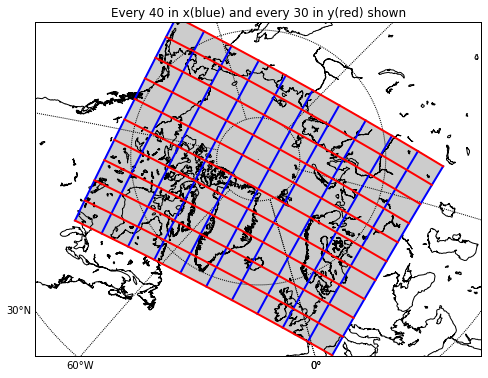

In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
import modeltools.forcing.bathy
#import modeltools.hycom.io
import abfile
import modeltools.cice.io

import numpy

bathy_threshold=-5.

grid1=modeltools.grid.Proj4Grid("+proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere",
                              -89.5,45.5,20000,20000,400,300)
figure=grid1.plotgrid(1.5)
#matplotlib.pyplot.show()

griddict = modeltools.grid.create_datadict_hycom(grid1)
abfile.write_regional_grid(griddict)
modeltools.cice.io.write_netcdf_grid(grid1,"cice_grid.nc")



2016-05-03 10:49:13,424 - modeltools.forcing.bathy -   DEBUG: Too few points to do filtering. Using raw bathymetry
2016-05-03 10:49:13,424 - modeltools.forcing.bathy -   DEBUG: Too few points to do filtering. Using raw bathymetry
2016-05-03 10:49:13,424 - modeltools.forcing.bathy -   DEBUG: Too few points to do filtering. Using raw bathymetry


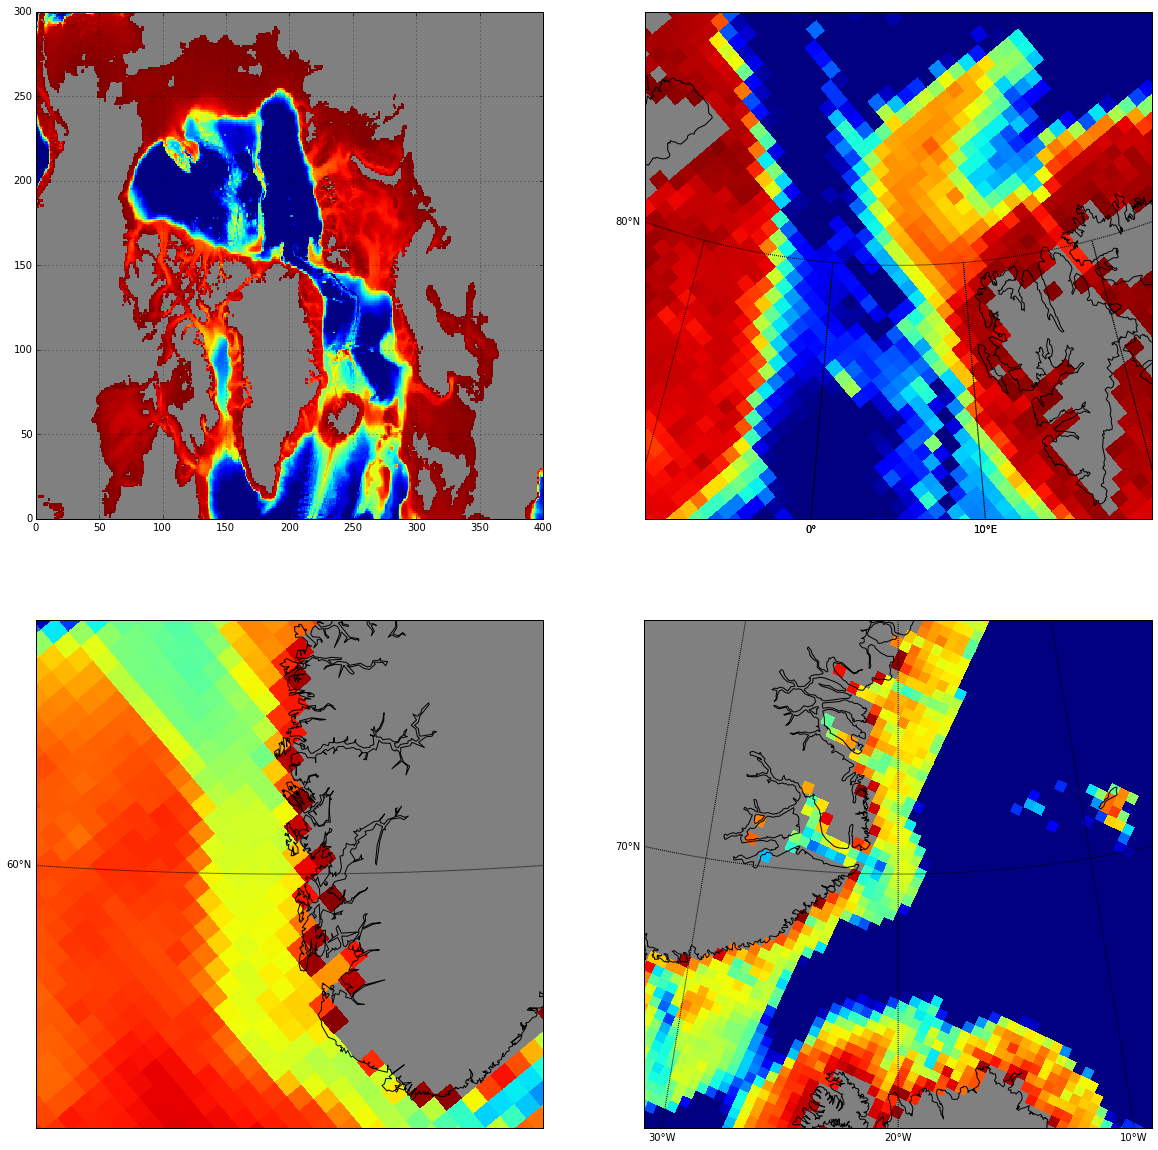

In [ ]:
from mpl_toolkits.basemap import Basemap
#gebco = modeltools.bathy.GEBCO2014("/Users/knutal/Bathymetry/GEBCO/GEBCO_2014_2D.nc")
gebco = modeltools.forcing.bathy.GEBCO2014("/work/shared/nersc/msc/ModelInput/bathymetry/GEBCO_2014/GEBCO_2014_2D_median20km.nc")

lon,lat=grid1.pgrid()

w2=gebco.regrid(lon,lat,width=grid1.dx)
w2=numpy.ma.masked_where(w2>=bathy_threshold,w2)





def plot_map(ax,m,lon,lat,w2) :
    x,y=m(lon,lat)
    P=m.pcolormesh(x,y,w2,ax=ax)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    m.drawcoastlines()
    m.drawmapboundary() # draw a line around the map region
    m.drawparallels(numpy.arange(-90.,120.,10.),labels=[1,0,0,0],ax=ax) # draw parallels
    m.drawmeridians(numpy.arange(0.,420.,10.),labels=[0,0,0,1],ax=ax) # draw meridians
    ax.grid()
    return P

def plot_excerpt(lon,lat,w2) :

    figure = matplotlib.pyplot.figure(figsize=(20,20))
    ax=figure.add_subplot(221)
    P=matplotlib.pyplot.pcolormesh(w2)
    P.set_clim(-3000,0)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    ax.grid()

    ax=figure.add_subplot(222)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)



    ax=figure.add_subplot(223)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(224)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)

    matplotlib.pyplot.show()
    
plot_excerpt(lon,lat,w2)


In [ ]:
print numpy.min(w2)
print numpy.max(w2)
w3=numpy.copy(w2)
w3=modeltools.tools.shapiro_filter(w3)

print "PAss 1"
w3=modeltools.tools.remove_one_neighbour_cells(w3)
w3=modeltools.tools.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.tools.remove_islets(w3)

print "PAss 2"
w3=modeltools.tools.remove_one_neighbour_cells(w3)
w3=modeltools.tools.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.tools.remove_islets(w3)

w3=numpy.ma.masked_where(w3>=bathy_threshold,w3)

plot_excerpt(lon,lat,w3)

2016-05-03 10:49:35,971 - modeltools.tools._misc -    INFO: Applying shapiro filter (1 pass, S=0.250)
2016-05-03 10:49:36,025 - modeltools.tools._misc -    INFO: Found 379 one neighbour cells
2016-05-03 10:49:36,033 - modeltools.tools._misc -    INFO: Found 87 one neighbour cells
2016-05-03 10:49:36,042 - modeltools.tools._misc -    INFO: Found 36 one neighbour cells
2016-05-03 10:49:36,050 - modeltools.tools._misc -    INFO: Found 15 one neighbour cells
2016-05-03 10:49:36,058 - modeltools.tools._misc -    INFO: Found 5 one neighbour cells
2016-05-03 10:49:36,066 - modeltools.tools._misc -    INFO: Found 4 one neighbour cells
2016-05-03 10:49:36,075 - modeltools.tools._misc -    INFO: Found 2 one neighbour cells
2016-05-03 10:49:36,082 - modeltools.tools._misc -    INFO: Found 2 one neighbour cells
2016-05-03 10:49:36,090 - modeltools.tools._misc -    INFO: Found 2 one neighbour cells
2016-05-03 10:49:36,099 - modeltools.tools._misc -    INFO: Found 2 one neighbour cells
2016-05-03 10

-5356.61553988
-5.00804144589
PAss 1
PAss 2

2016-05-03 10:49:36,694 - modeltools.tools._misc -    INFO: Found 0 one neighbour cells
2016-05-03 10:49:36,698 - modeltools.tools._misc -    INFO: Main feature in terms of cells is feature 1
2016-05-03 10:49:36,703 - modeltools.tools._misc -    INFO: Position (  0.000, 60.000) : Feature 1 is used
2016-05-03 10:49:36,708 - modeltools.tools._misc -    INFO: Position ( 36.000, 75.000) : Feature 1 is used
2016-05-03 10:49:36,718 - modeltools.tools._misc -    INFO: Found 0 islets


In [ ]:
def plot_sidebyside(lon,lat,w2,w3) :

    figure = matplotlib.pyplot.figure(figsize=(15,40))

    ax=figure.add_subplot(521)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)
    
    ax=figure.add_subplot(522)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-3000,0)


    ax=figure.add_subplot(523)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(524)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-750,0)

    
    ax=figure.add_subplot(525)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-2000,0)
    
    ax=figure.add_subplot(526)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-2000,0)
    
    
    ax=figure.add_subplot(527)
    m = Basemap(width=1500000,height=1500000,
                resolution='i',projection='stere',\
                lat_ts=75,lat_0=75,lon_0=-100)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(528)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-500,0)
    
    ax=figure.add_subplot(529)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=55,lat_0=55,lon_0=0)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-300,0)
    
    ax=figure.add_subplot(5,2,10)
    P=plot_map(ax,m,lon,lat,w3)
    P.set_clim(-300,0)

    matplotlib.pyplot.show()
    
    
plot_sidebyside(lon,lat,w2,w3)

In [ ]:
abfile.write_bathymetry("TPTa0.20",1,-w3,-bathy_threshold)
print w3.mask
print numpy.max(w3)
print numpy.min(w3)
print bathy_threshold
kmt=numpy.where(~w3.mask,1.,0.)
print numpy.max(kmt)
print numpy.min(kmt)
modeltools.cice.io.write_netcdf_kmt(kmt,"cice_kmt.nc")

In [ ]:
tmp=abfile.ABFileBathy("depth_TPTa0.20_01","r",idm=w3.shape[1],jdm=w3.shape[0])
w4=tmp.read_field("depth",[])
w4=numpy.ma.masked_where(w4> abfile.AFile._huge*.5,w4)
tmp.close()
figure = matplotlib.pyplot.figure(figsize=(10,10))
ax=figure.add_subplot(111)
P=matplotlib.pyplot.pcolormesh(w4)
#P.set_clim(0,3000)
ax = P.get_axes()
ax.set_axis_bgcolor('.5')
ax.grid()
